In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/loan-dataset/LoanDataset - LoansDatasest.csv')

In [3]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [5]:
df['historical_default'].unique()

array(['Y', nan, 'N'], dtype=object)

In [6]:
df['historical_default']=df['historical_default'].fillna('Not_available')

In [7]:
df['historical_default'].unique()

array(['Y', 'Not_available', 'N'], dtype=object)

In [8]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        32586 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   32586 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,Not_available,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [12]:
df.drop('customer_id', axis=1, inplace=True)

In [13]:
df['customer_income']=df['customer_income'].str.replace(',','')

In [14]:
df['customer_income']=pd.to_numeric(df['customer_income'])

In [15]:
df['loan_amnt']=df['loan_amnt'].str.replace(',','')
df['loan_amnt']=df['loan_amnt'].str.replace('£','')
df['loan_amnt']=pd.to_numeric(df['loan_amnt'])

In [16]:
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,1000.0,11.14,1,Not_available,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31683.0,27.745352,6.373760,3.00,23.00,26.000000,30.00,144.00
customer_income,31683.0,66692.259445,62431.892148,4000.00,39331.50,56000.000000,80000.00,6000000.00
employment_duration,31683.0,4.790014,4.143099,0.00,2.00,4.000000,7.00,123.00
loan_amnt,31683.0,9832.517438,22057.313193,500.00,5000.00,8000.000000,12500.00,3500000.00
loan_int_rate,31683.0,11.036835,3.070376,5.42,8.49,11.011553,13.16,23.22
term_years,31683.0,4.770413,2.472167,1.00,3.00,4.000000,7.00,10.00
cred_hist_length,31683.0,5.808793,4.061198,2.00,3.00,4.000000,8.00,30.00


In [18]:
numdf=df.select_dtypes(exclude=object)
catdf=df.select_dtypes(include=object)

<Axes: >

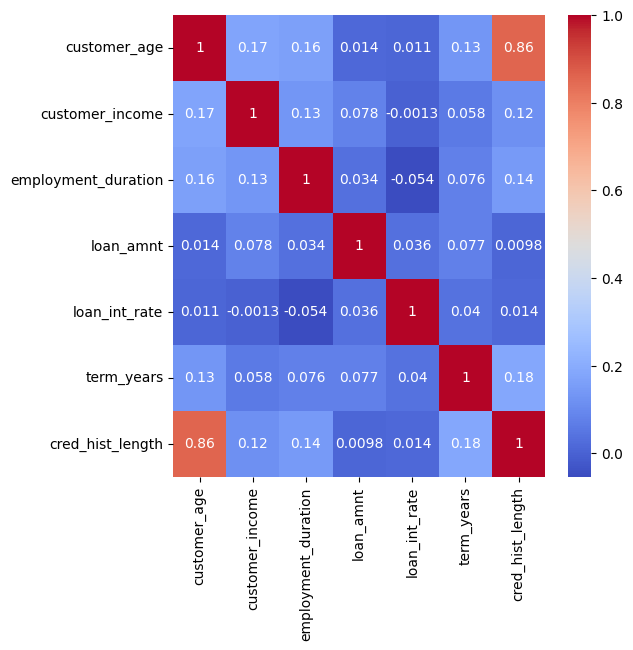

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(numdf.corr(), cmap='coolwarm', annot=True)

In [20]:
# sns.pairplot(numdf)

In [21]:
print(df.shape)
print(numdf.shape)
print(catdf.shape)

(31683, 12)
(31683, 7)
(31683, 5)


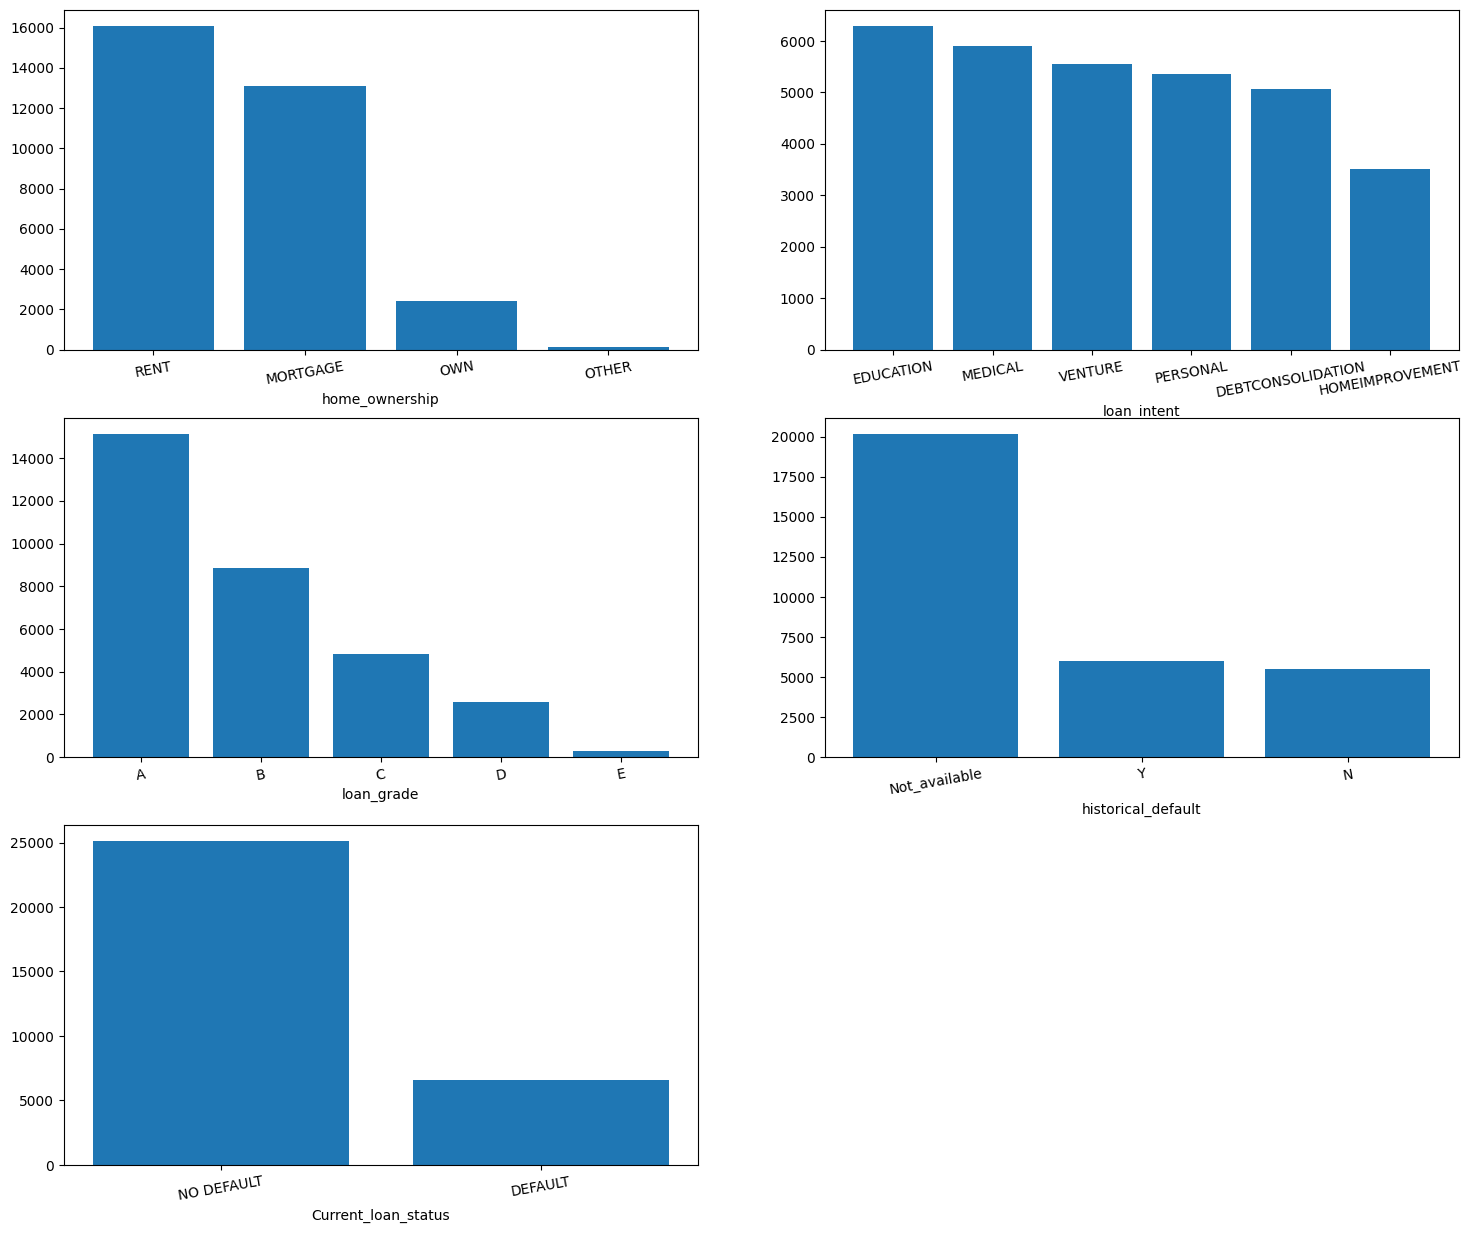

In [22]:
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(3,2,plot)
    value=catdf[column].value_counts(ascending=False)
    plt.bar(value.index, value.values)
    plt.xlabel(column)
    plt.xticks(rotation=10)
    plot+=1
plt.show()

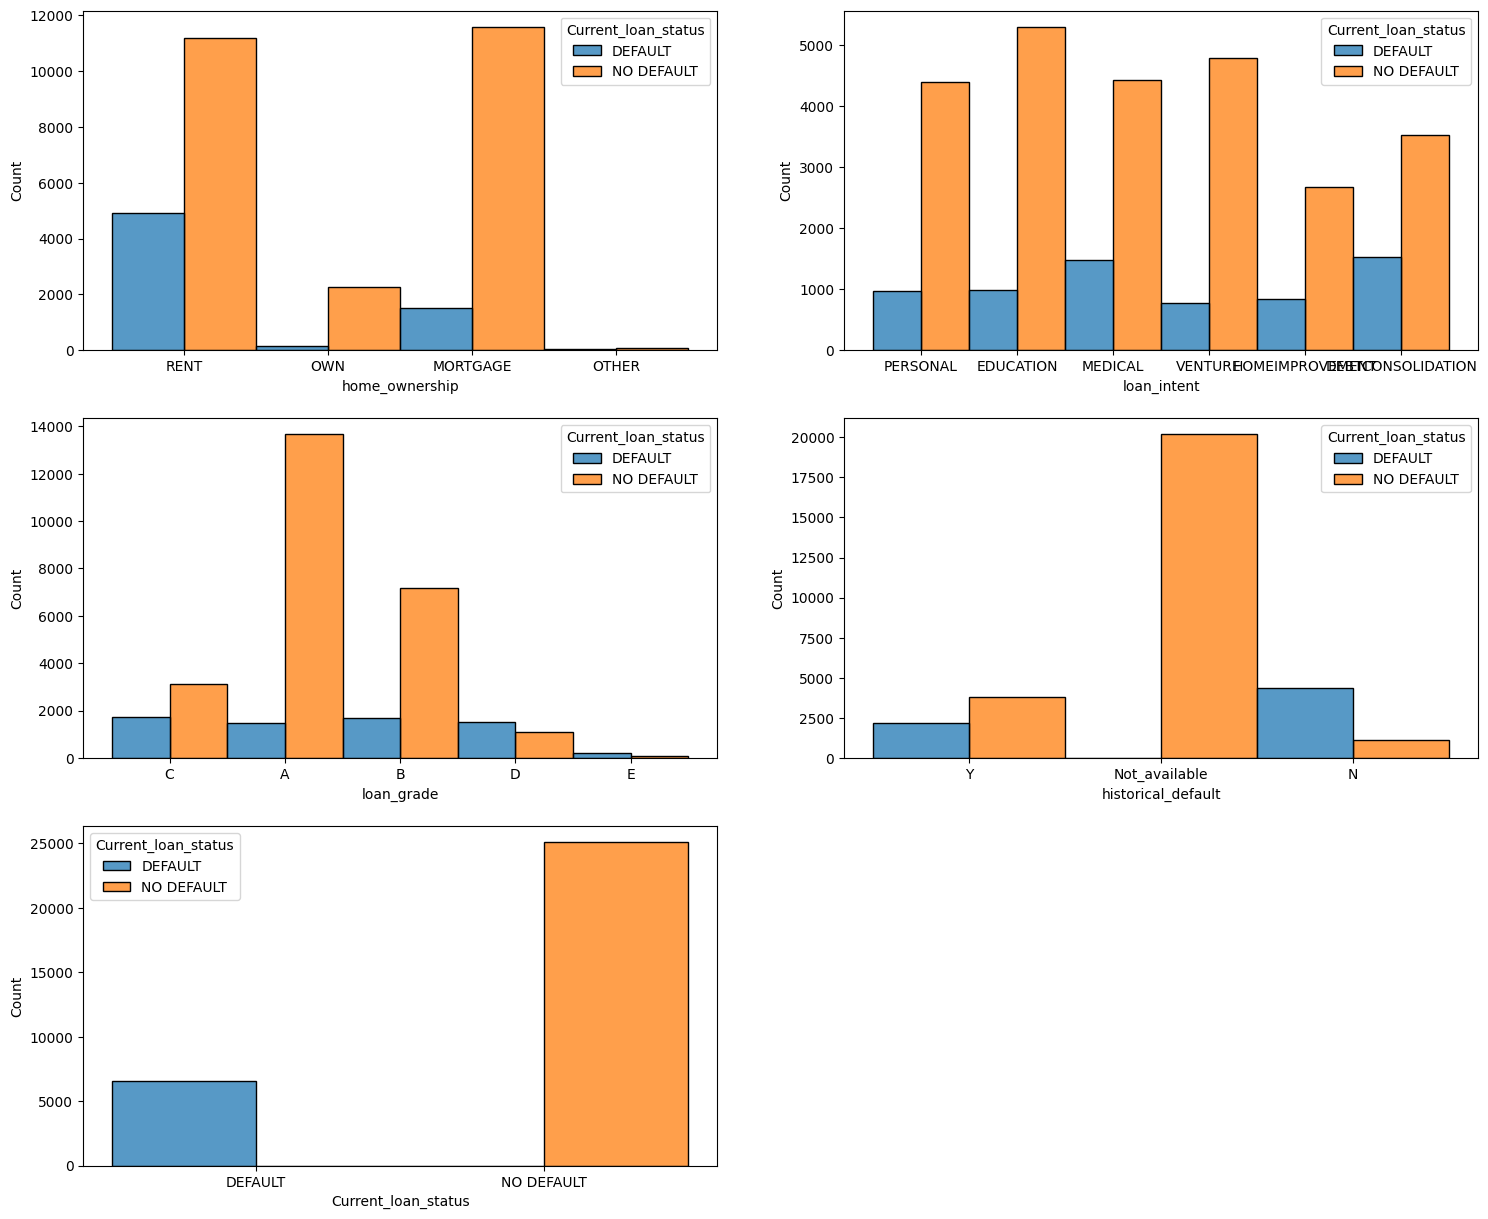

In [23]:
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(3,2,plot)
    sns.histplot(catdf, x=column, hue='Current_loan_status', multiple='dodge')
    plot+=1
plt.show()

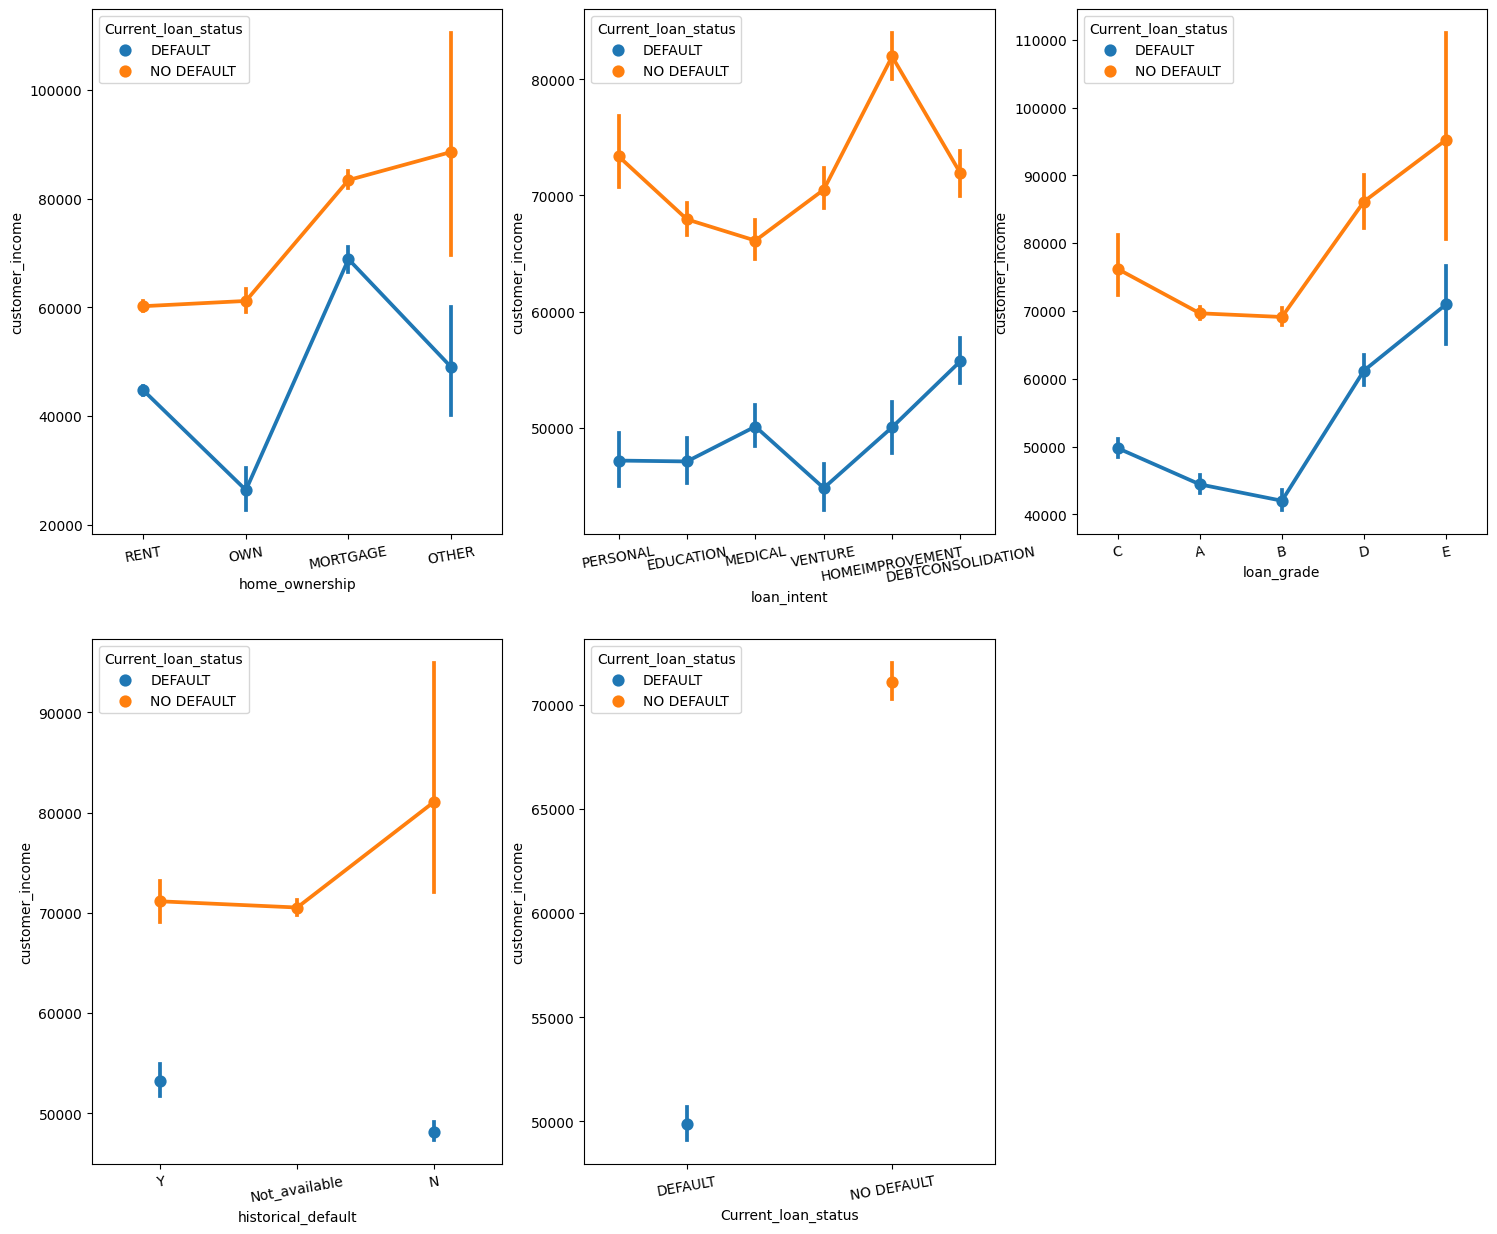

In [24]:
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(2,3,plot)
    sns.pointplot(catdf, x=column,y=df['customer_income'], hue=df['Current_loan_status'])
    plt.xticks(rotation=10)
    plot+=1
plt.show()

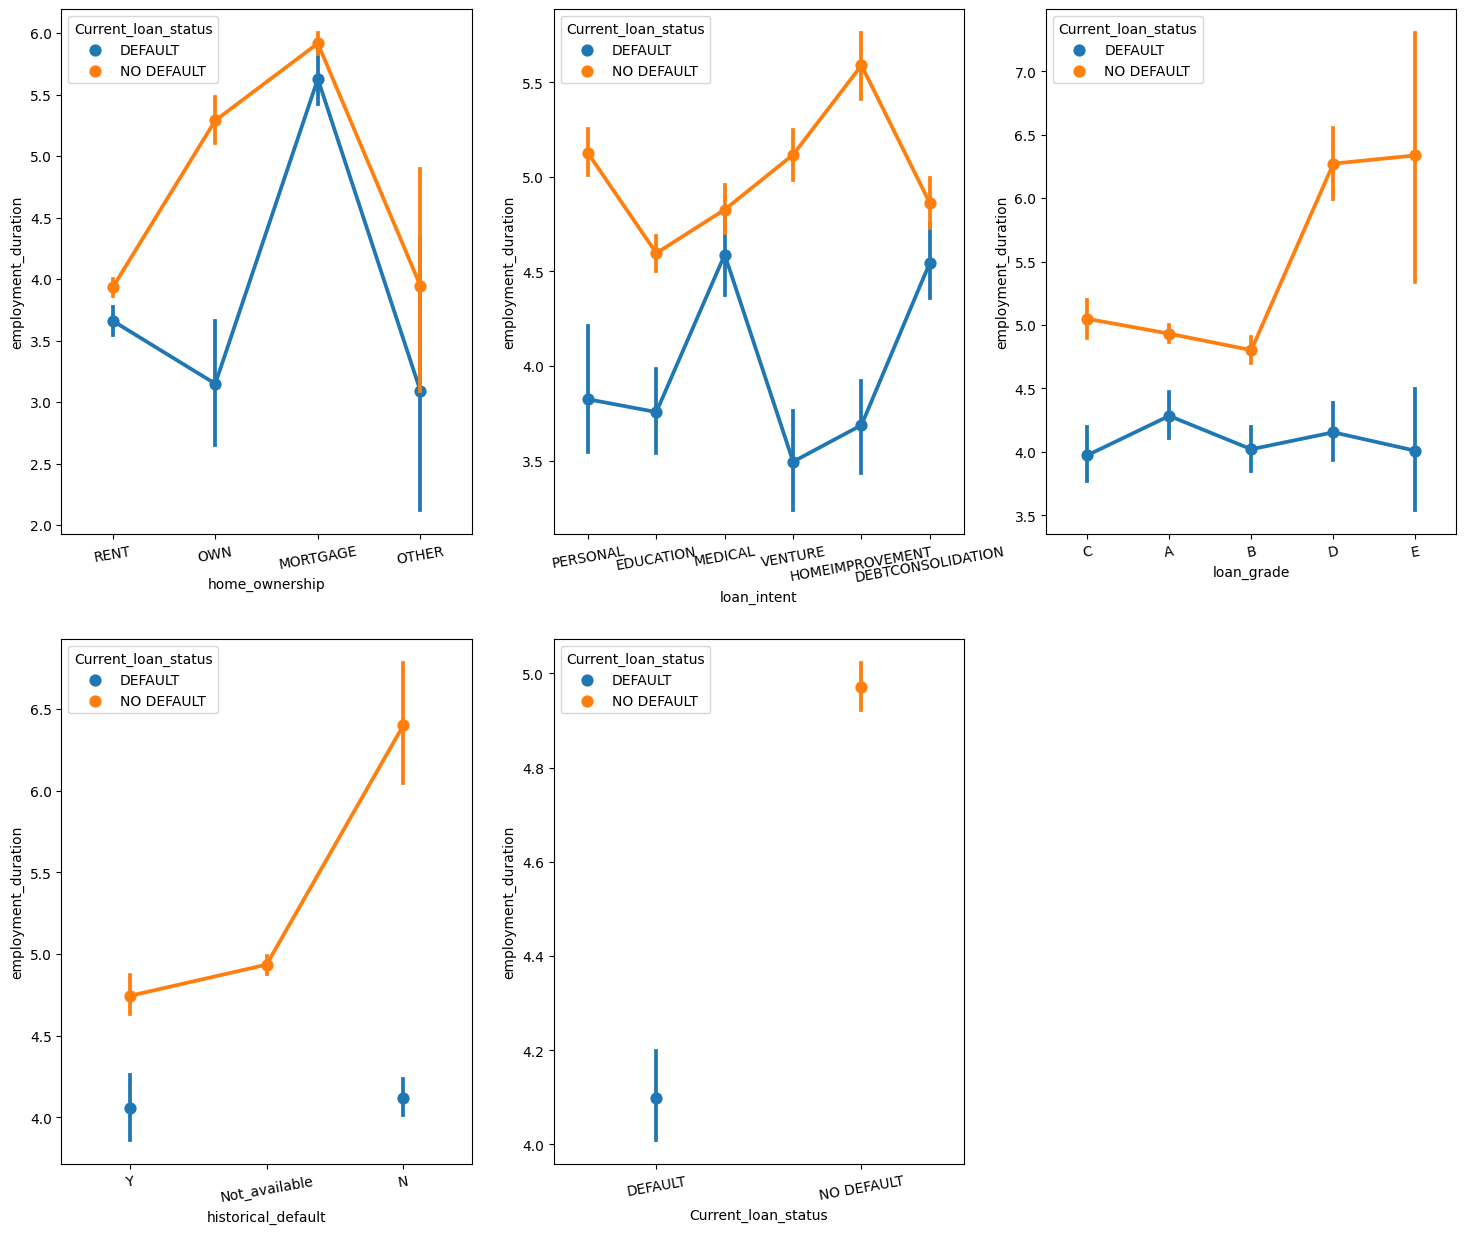

In [25]:
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(2,3,plot)
    sns.pointplot(catdf, x=column,y=df['employment_duration'], hue=df['Current_loan_status'])
    plt.xticks(rotation=10)
    plot+=1
plt.show()

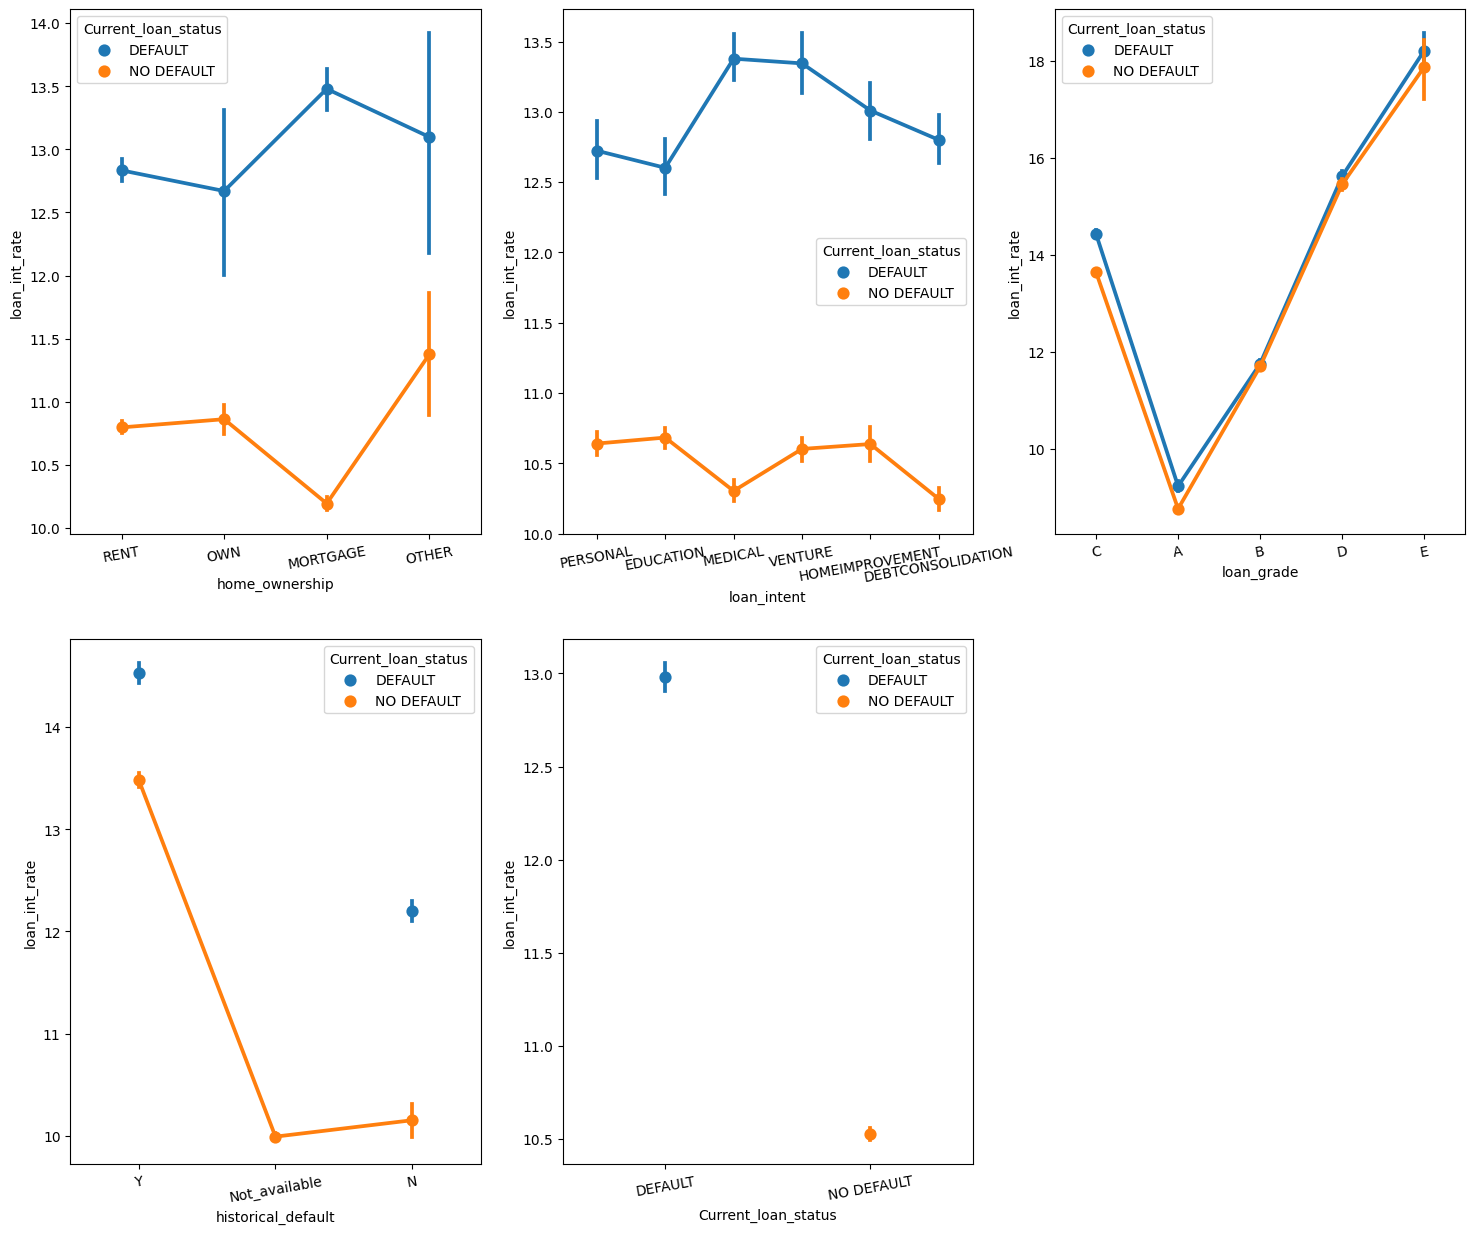

In [26]:
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(2,3,plot)
    sns.pointplot(catdf, x=column,y=df['loan_int_rate'], hue=df['Current_loan_status'])
    plt.xticks(rotation=10)
    plot+=1
plt.show()

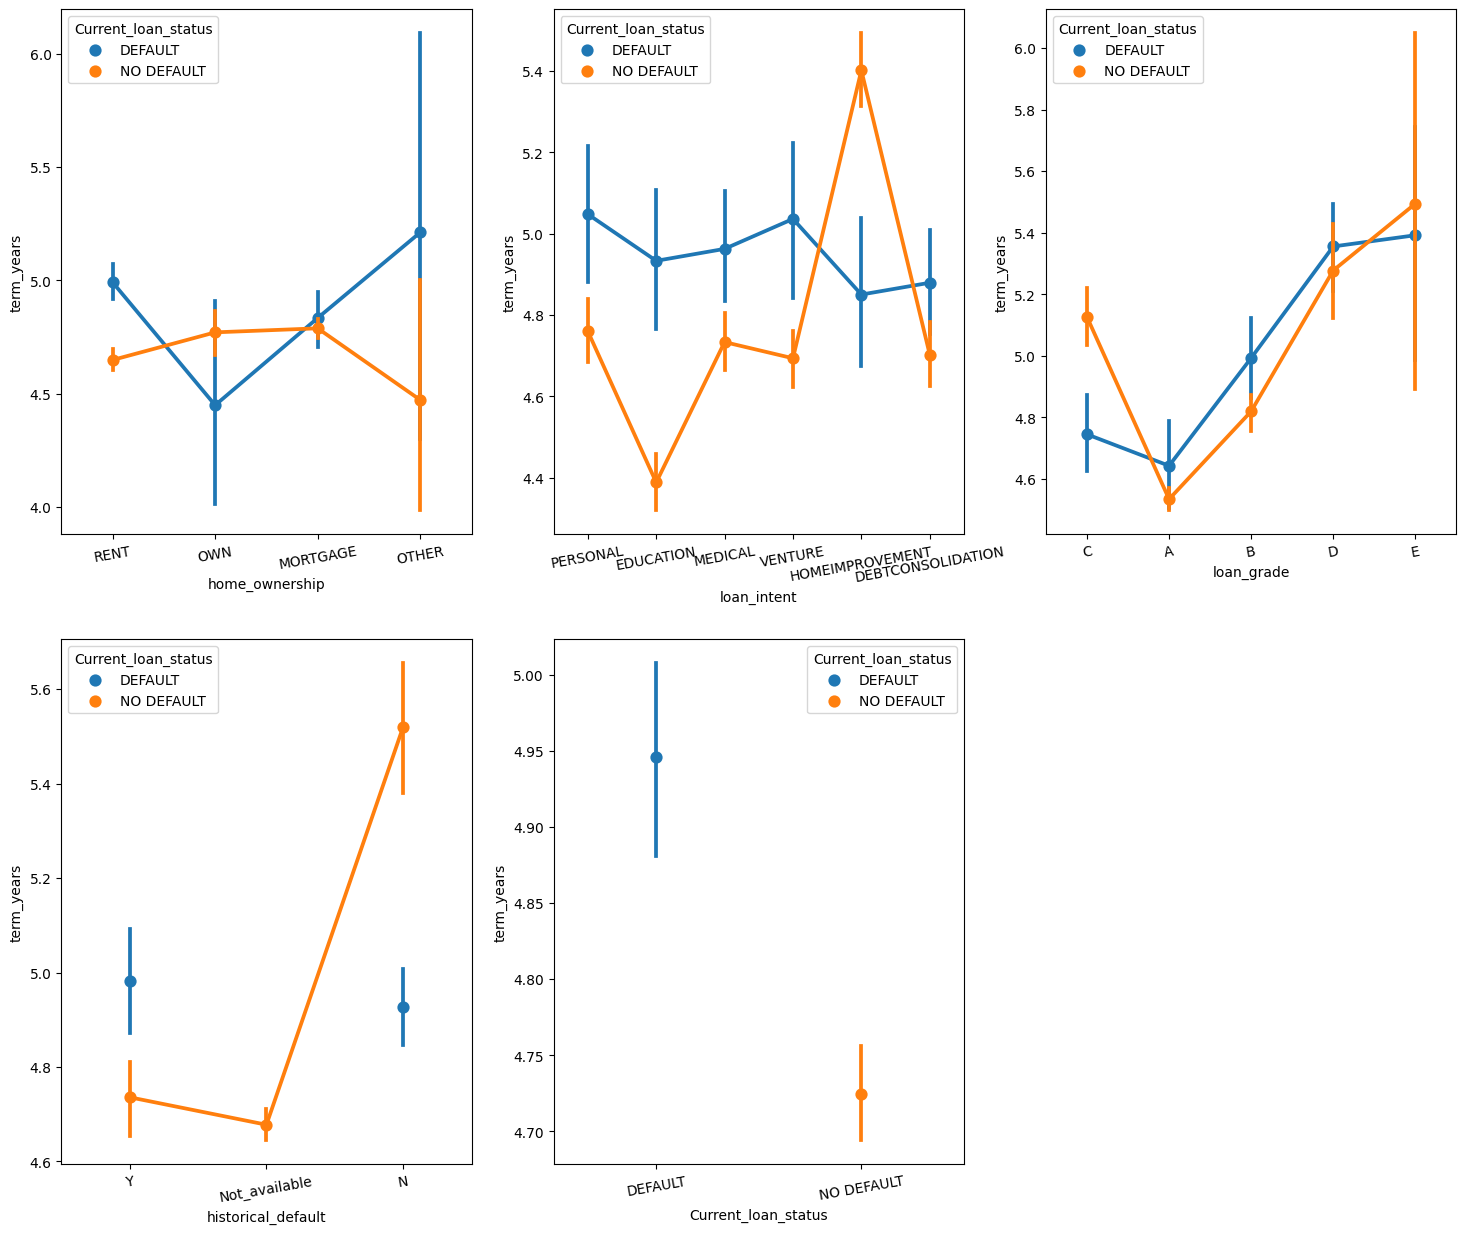

In [27]:
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(2,3,plot)
    sns.pointplot(catdf, x=column,y=df['term_years'], hue=df['Current_loan_status'])
    plt.xticks(rotation=10)
    plot+=1
plt.show()

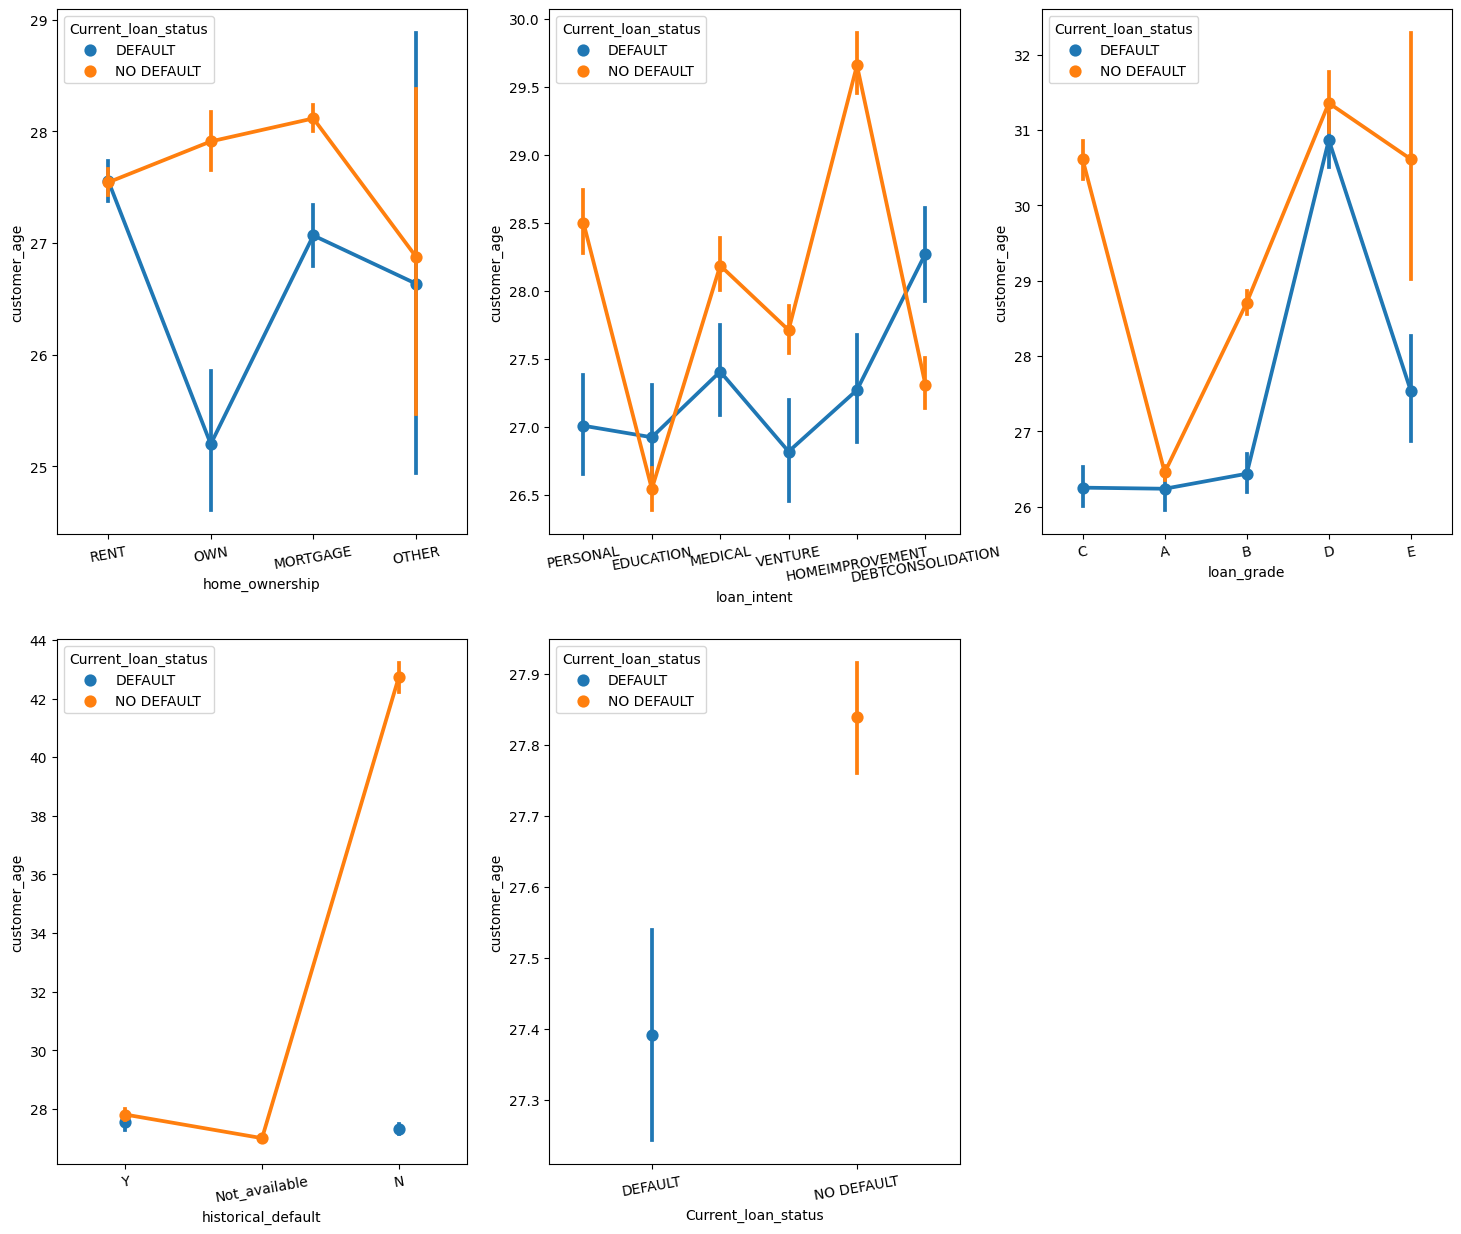

In [28]:
plt.figure(figsize=(18,15))
plot=1
for column in catdf:
    ax=plt.subplot(2,3,plot)
    sns.pointplot(catdf, x=column,y=df['customer_age'], hue=df['Current_loan_status'])
    plt.xticks(rotation=10)
    plot+=1
plt.show()

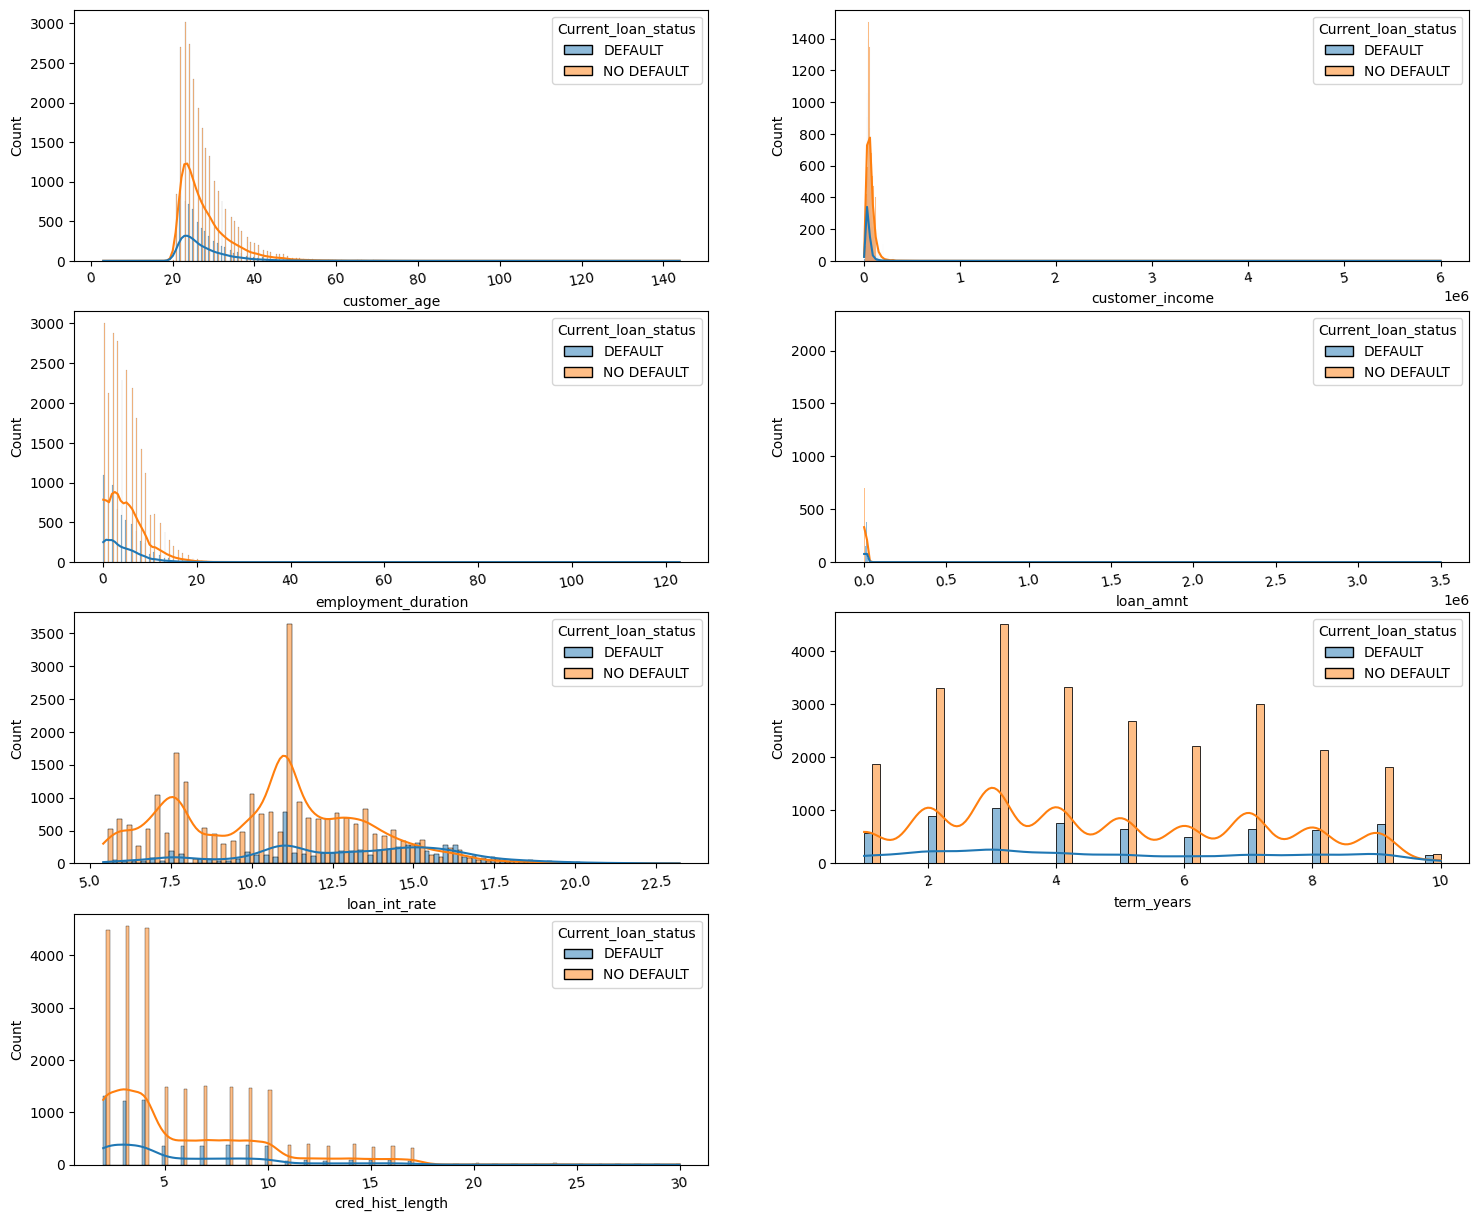

In [29]:
plt.figure(figsize=(18,15))
plot=1
for column in numdf:
    ax=plt.subplot(4,2,plot)
    sns.histplot(numdf,x=column,hue=df['Current_loan_status'], kde=True, multiple='dodge')
    plt.xticks(rotation=10)
    plot+=1
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [31]:
catdf.columns

Index(['home_ownership', 'loan_intent', 'loan_grade', 'historical_default',
       'Current_loan_status'],
      dtype='object')

In [32]:
categorical_features = ['home_ownership', 'loan_intent', 'loan_grade', 'historical_default']

# Define the ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep the remaining columns (i.e., numeric features)
)

# Define the logistic regression model
logreg = LogisticRegression()

# Create a pipeline that first transforms the data then applies the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

In [33]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'historical_default'])])),
                ('classifier', LogisticRegression())])

In [36]:
# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Logistic Reg: {accuracy}')

Accuracy Logistic Reg: 0.839040555467887


In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtc=DecisionTreeClassifier()

In [39]:
# Define the ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep the remaining columns (i.e., numeric features)
)


# Create a pipeline that first transforms the data then applies the model
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dtc)
])

In [40]:
# Train the model
pipeline1.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = pipeline1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decion Tree: {accuracy}')


Accuracy of Decion Tree: 0.9578664983430646


In [41]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

bc=BaggingClassifier()
rf=RandomForestClassifier()
abc=AdaBoostClassifier()

In [42]:
# Define the ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep the remaining columns (i.e., numeric features)
)


# Create a pipeline that first transforms the data then applies the model
pipelinebc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', bc)
])

# Create a pipeline that first transforms the data then applies the model
pipelinerf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])


# Create a pipeline that first transforms the data then applies the model
pipelineabc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', abc)
])

In [43]:
# Train the model
pipelinebc.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = pipelinebc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy}')


Accuracy of Bagging Classifier: 0.966387880700647


In [44]:
# Train the model
pipelinerf.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = pipelinerf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy}')


Accuracy of Random Forest: 0.9715953921413918


In [45]:
# Train the model
pipelineabc.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = pipelineabc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest AdaBoostClassifier: {accuracy}')


Accuracy of Random Forest AdaBoostClassifier: 0.9447688180527063


In [46]:
# It is clear that the RandomForest has the highest Accuracy
import pickle
with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)